# [Assignment 10](https://ovgu-ailab.github.io/idl2023/assignment10.html)

Adrian Bremer

## Setup

In [223]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
tfkl = tf.keras.layers

In [224]:
tf.executing_eagerly=True

In [225]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

train_images = train_images.astype(np.float32) / 255
test_images = test_images.astype(np.float32) / 255
train_labels = train_labels.astype(np.int32)
test_labels = test_labels.astype(np.int32)

train_images.shape

(50000, 32, 32, 3)

## Starter from E-Learning

In [226]:
# example for a very simple MLP architecture for autencoding and classification
# (e.g. for MNIST)
n_hidden = 128
code_dim = 32

# note: we use 784 units since we need the same number of outputs as we have inputs in the data!
# here the final layer has no activation; we could also use tf.nn.sigmoid to force the data to [0, 1]
autoencoder = tf.keras.Sequential([tfkl.Dense(n_hidden, tf.nn.relu),
                                   tfkl.Dense(code_dim),
                                   tfkl.Dense(n_hidden, tf.nn.relu),
                                   tfkl.Dense(784)])

In [227]:
# it's better to keep encoder and decoder separated

encoder = tf.keras.Sequential([tfkl.Dense(n_hidden, tf.nn.relu),
                                   tfkl.Dense(code_dim)])

decoder = tf.keras.Sequential([tfkl.Dense(n_hidden, tf.nn.relu),
                                   tfkl.Dense(784)])

autoencoder = tf.keras.Sequential([encoder, decoder])

autoencoder.build((None, 784))


# very simple to build a classifier on top of the encoder
classifier = tf.keras.Sequential([encoder, tf.keras.layers.Dense(10)])
classifier.build((None, 784))

In [228]:
# compare summary when leaving the argument out (or setting to False)
autoencoder.summary(expand_nested=True)

Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_86 (Sequential)  (None, 32)                104608    
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| dense_64 (Dense)           (None, 128)               100480   |
|                                                               |
| dense_65 (Dense)           (None, 32)                4128     |
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
 sequential_87 (Sequential)  (None, 784)               105360    
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| dense_66 (Dense)           (None, 128)               4224     |
|                                                               |
| dense_67 (Dense)           (None, 784)               101136   |
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
Total params: 209968 (820.19 KB)
Trainable params: 20

In [229]:
#print("ENCODER")
#print(encoder.trainable_variables)
#print("\nCLASSIFIER")
# note: first two variables of the classifier are equal to the encoder (same random weights)
# weight sharing!
#print(classifier.trainable_variables)

# check identity of the weight objects
print(encoder.trainable_variables[0] is classifier.trainable_variables[0])

True


In [230]:
encoder.trainable = False  # Freeze the encoder!
print("ENCODER")  # no more trainable variables
print(encoder.trainable_variables)
print("\nCLASSIFIER")  # the encoder variables are no longer there! only the classifier variables are trainable
print(classifier.trainable_variables)

# NOTE of course you should train the autoencoder FIRST and only then
# freeze the encoder =)

ENCODER
[]

CLASSIFIER
[<tf.Variable 'dense_68/kernel:0' shape=(32, 10) dtype=float32, numpy=
array([[-6.67713284e-02,  2.11577624e-01,  1.29300684e-01,
        -5.63405454e-02,  2.99171001e-01,  1.70754999e-01,
        -2.69435972e-01, -3.68251741e-01,  9.88336205e-02,
         1.40189618e-01],
       [ 1.52160853e-01, -6.22897744e-02, -4.20471728e-02,
        -3.24654341e-01, -7.97001123e-02, -1.38039485e-01,
         2.47293025e-01, -1.92575336e-01, -1.79137841e-01,
         1.75379723e-01],
       [-6.48225248e-02, -4.38831449e-02,  3.68997425e-01,
         3.12955409e-01,  1.72188878e-03, -2.29484126e-01,
        -1.56468198e-01,  1.25023812e-01,  2.41901904e-01,
         3.84398103e-02],
       [-1.18278444e-01, -2.31800228e-01,  2.80265480e-01,
        -4.61074710e-03, -2.00454891e-01, -3.54995370e-01,
         2.68394977e-01,  3.33717555e-01, -2.86009431e-01,
         2.52877682e-01],
       [ 9.25470889e-02, -3.40357572e-01, -3.25362176e-01,
         3.52746159e-01,  1.8653985

In [231]:
# compiling/training works just like before.
# could create a dataset where target == input and then train using model.fit.
# simple, reasonable loss functions include binary cross-entropy IF you use sigmoid outputs
# or mean squared error.
# But recall the discussion in the exercise about how these are not "really" appropriate.
autoencoder.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.MeanSquaredError())

# btw be careful, there is also tf.losses.MSE() but this is different :(

In [232]:
# a dataset for an autoencoder may be created like this (to be put into model.fit).
# targets are equal to inputs.
train_data = tf.data.Dataset.from_tensor_slices((train_images, train_images))

In [233]:
# using convolutional AE?
# down- and upscaling can be problematic with MNIST
# e.g. say were are down/upscaling by factor (stride) of 2

# mnist is 28x28. output size != input size! This won't work...
# 28 -> 14 -> 7 -> 4 -> 8 -> 16 -> 32

# one solution: stop downsizing if input size is odd.
# 28 -> 14 -> 7 -> 14 -> 28

# better: use inputs with size 2**n
# 32 -> 16 -> 8 -> 4 -> 8 -> 16 -> 32

In [234]:
# could pad MNIST images to 32 (2**5) like this
mnist = np.random.normal(size=(16, 28, 28, 1))
print(mnist.shape)

mnist_padded = np.pad(mnist, ((0, 0), (2, 2), (2, 2), (0, 0)), mode="constant")
print(mnist_padded.shape)

(16, 28, 28, 1)
(16, 32, 32, 1)


In [235]:
# one way to upsample (e.g. in decoder): transposed convolution with stride > 1
transposed_conv = tf.keras.layers.Conv2DTranspose(4, 3, strides=2, padding="same")
print(transposed_conv(mnist_padded).shape)  # it got bigger!

(16, 64, 64, 4)


In [236]:
# another solution: explicit upsampling
a = tf.constant([[1, 2], [3, 4]])
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [237]:
upsampling = tf.keras.layers.UpSampling2D(2)(a[None, :, :, None])  # add batch and channel axis via None
print(upsampling[0, :, :, 0])  # so-called nearest-neighbor upsampling
# now we can use regular convolution (Conv2D) to transform the upsampled values
# Conv2D does not suffer from the checkerboard artifacts like Conv2DTranspose

tf.Tensor(
[[1 1 2 2]
 [1 1 2 2]
 [3 3 4 4]
 [3 3 4 4]], shape=(4, 4), dtype=int32)


In [238]:
# example of how to choose a small labeled subset
# full mnist data: use for training self-supervised model (no labels required)
#(train_imgs, train_labels), _ = tf.keras.datasets.mnist.load_data()

In [239]:
# pick a random subset
#labeled_indices = np.random.choice(60000, replace=False, size=1000)

In [240]:
# choose corresponding images and labels
#image_subset = train_imgs[labeled_indices]
#label_subset = train_labels[labeled_indices]

In [241]:
#image_subset.shape

## Own stuff

### Building a model

In [285]:
class RandomTransformation(tfkl.Layer):
    def __init__(self, transformations, output_img_shape):
        self.transformations = transformations
        self.output_img_shape = output_img_shape
        
        self._trainable = False
        self._trainable_weights = []
        self._non_trainable_weights = []
        self._name = "Random_Transformation"
        self._inbound_nodes = []
        self._dynamic = False
        self._metrics = []
        
    def build(self, input_shape):
        for t in self.transformations:
            t.build(input_shape)
        
    def __call__(self, inputs):
        rand_idx = int(np.random.uniform(0, len(self.transformations)))
        layer = self.transformations[rand_idx]
        transformed = layer(inputs)
        h,w = tf.shape(transformed)[1:3]
        des_h, des_w = self.output_img_shape
        dh,dw = (des_h-h, des_w-w)
        # batch, height, width, channels
        padded = tf.pad(transformed, [[0,0], [dh//2, dh//2+dh%2], [dw//2, dw//2+dw%2], [0,0]])
        return padded
    
class NoisifyLayer(tfkl.Layer):
    def __init__(self, noise_amount=0.2, noise_range=(-1.0, 1.0)):
        self.noise_amount=0.2
        self.noise_range=noise_range
        
        self._trainable = False
        self._self_tracked_trackables = []
        self._trainable_weights = []
        self._non_trainable_weights = []
        self._name = "NoisifyLayer"
        self._inbound_nodes = []
        self._dynamic = False
        self._metrics = []
        
    def build(self, input_shape):
        pass
    
    def __call__(self, inputs):
        (_,h,w,_) = tf.shape(inputs)
        for x in range(w):
            for y in range(h):
                if tf.random.uniform(shape=[1],minval=0.0,maxval=1.0)[0] < self.noise_amount:
                    l,u = self.noise_range
                    inputs[:,y,x,:] += tf.random.uniform(shape=[1],minval=l,maxval=u)[0]
        inputs = tf.clip_by_value(inputs, 0.0, 1.0)
        return inputs

In [286]:
input_transformer = RandomTransformation([
    tfkl.RandomCrop(height=28, width=28),
    tfkl.RandomBrightness(factor=0.2, value_range=[0.0, 1.0]),
    tfkl.RandomFlip(),
    NoisifyLayer()
], (32,32))

#### Trying out the Random Transformation Layer

In [287]:
imgs = train_images[:16]
print(np.shape(imgs))

(16, 32, 32, 3)


In [288]:
def plot_images(imgs):
    n = int(np.sqrt(np.shape(imgs)[0]))
    fig,ax = plt.subplots(n,n)
    for i,img in enumerate(imgs):
        y = i//n
        x = i%n
        ax[y,x].imshow(img)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

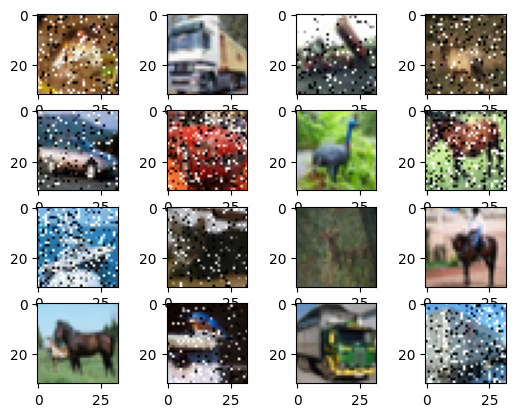

In [289]:
plot_images(imgs)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


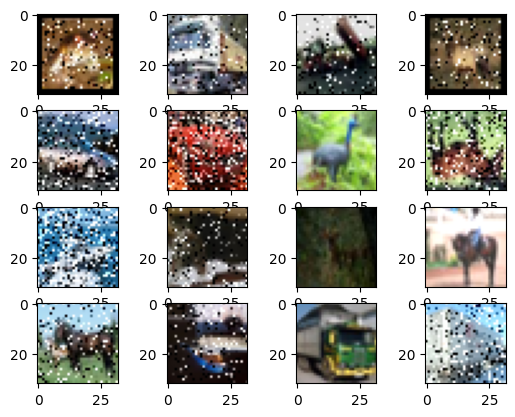

In [290]:
transformed_imgs = [np.reshape(input_transformer(np.reshape(img, (1,32,32,3))), (32,32,3)) for img in imgs]
plot_images(transformed_imgs)

#### Encoder Decoder

In [291]:
# 32->16->8->4
encoder = tf.keras.Sequential([
    tfkl.Conv2D(8,3,strides=2,padding="same"),
    tfkl.BatchNormalization(),
    tfkl.Conv2D(16,3,strides=2,padding="same"),
    tfkl.BatchNormalization(),
    tfkl.Conv2D(32,3,strides=2,padding="same")#,
    #tfkl.Flatten()
])

# 4->8->16->32
decoder = tf.keras.Sequential([
    tfkl.Conv2DTranspose(16,3,strides=2,padding="same"),
    tfkl.Conv2DTranspose(8,3,strides=2,padding="same"),
    tfkl.Conv2DTranspose(3,3,strides=2,padding="same")
])
"""Transpose COnvolution isn't working that nicely..."""

#decoder = tf.keras.Sequential([
#    tfkl.Dense(1024,activation="relu"),
#    tfkl.Dense(2048,activation="relu"),
#    tfkl.Dense(32*32*3,activation="sigmoid"),
#    tfkl.Reshape((None,32,32,3))
#])

autoencoder = tf.keras.Sequential([input_transformer, encoder, decoder])
#autoencoder.build((None,32,32,3))
#autoencoder.summary(expand_nested=True)

In [292]:
img_prediction_data = tf.data.Dataset.from_tensor_slices((train_images, train_images)).shuffle(5000).batch(16).repeat()

In [293]:
autoencoder.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss=tf.keras.losses.MeanSquaredError()
)

In [294]:
#early_stop = tf.keras.callbacks.EarlyStopping(patience=3)
#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau()
autoencoder.fit(
    img_prediction_data, 
    epochs=30, steps_per_epoch=50#, 
    #callbacks=[early_stop,reduce_lr], 
    #validation_data=(test_images,test_labels)
)

Epoch 1/30


AttributeError: in user code:

    File "/home/adrian/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "/home/adrian/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/adrian/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "/home/adrian/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "/home/adrian/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/adrian/.local/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 2421, in _clear_losses
        layer._thread_local._eager_losses = []

    AttributeError: 'RandomTransformation' object has no attribute '_thread_local'


In [ ]:
test = test_images[:16]
trained_autoencoder = tf.keras.Sequential([encoder,decoder])
restored_test_images = autoencoder(test)
plot_images(test)
plot_images(restored_test_images)